# How to Use AQiPT Transpiler

We must import the Transpiler class, the configuration classes if we intend to perform a customized configuration, and the RydbergQuantumCircuit class, which is a modification of the Qiskit version and it works exactly the same with the addition of the Rydberg Native Gates. It's also a good practice to also import the qutip library to make easy the definition of the initial states for simulation (if wanted).

Note: In order for this notebook to work, the notebook must be in the same folder as AQiPT Transpiler.

In [1]:
import qutip as qt
from AQiPT_transpiler.transpiler import Transpiler
from AQiPT_transpiler.config.core import *
from AQiPT_transpiler.utils.rydberg_circuit import RydbergQuantumCircuit

We define the BackendConfiguration and specify the SimilationConfig. Normaly, the most common configuration is the time_simulation and the sampling.

In [2]:
new_backend = BackendConfig(
    simulation_config=SimulationConfig(
        time_simulation=0.35,
        sampling=2000
    )
)

## One qubit gate

To produce the transpilation for One qubit circuito we build the RQC first like we would do on Qiskit:

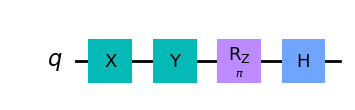

In [3]:
qc = RydbergQuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.h(0)
qc.draw(output="mpl")

Then we define the a Transpiler with the new backend configuration. We invoke the method transpile of the transpiler giving the RQC we built before. The method transpile will return a RydbergQubitSchedule that we can plot to see the full schedule.

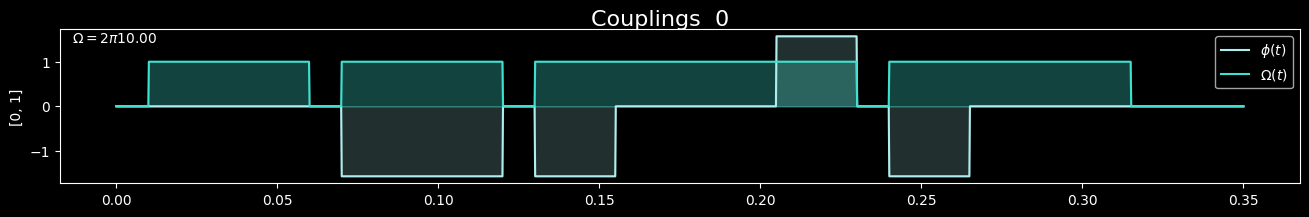

In [4]:
qc_transpiler = Transpiler(backend_config=new_backend)
ryd_schedule = qc_transpiler.transpile(qc)
ryd_schedule.plot_schedule()

To produce a simulation, we invoke the method of the our transpiler: build_transpiled_circuit. The transpiler will remember the RQC we transpiled and the schedule that was produced and run the simulation of the system using RydbergQubit class. The method will return a RydbergQubit that will contain the information of the simulation. We can plot that using the atom property and its showResults method.

In [5]:
rydberg_register = qc_transpiler.build_transpiled_circuit(init_state=qt.basis(4,0))
rydberg_register.atom.showResults(plot_mode="plotly", figure_size=(800, 600))

<Figure size 800x800 with 0 Axes>

## More than one qubit

The process is very similar. We build first the circuit:

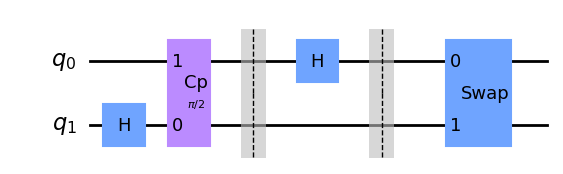

In [6]:
qc = RydbergQuantumCircuit(2)
qc.qft(2)
qc.draw(output="mpl")

We could create a totally new backend configuration:

In [7]:
new_backend = BackendConfig(
    simulation_config=SimulationConfig(
        time_simulation=0.4,
        sampling=2000
    )
)

Build the transpiler and watch the schedule produced

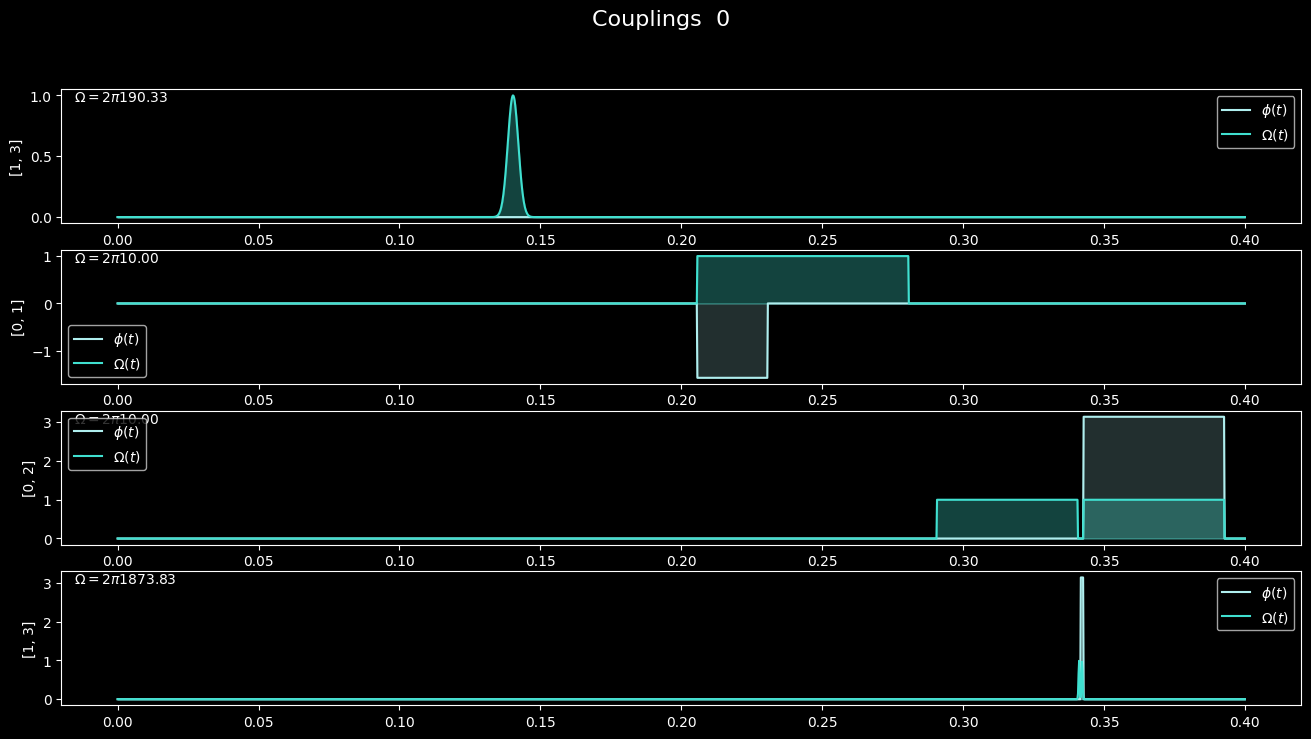

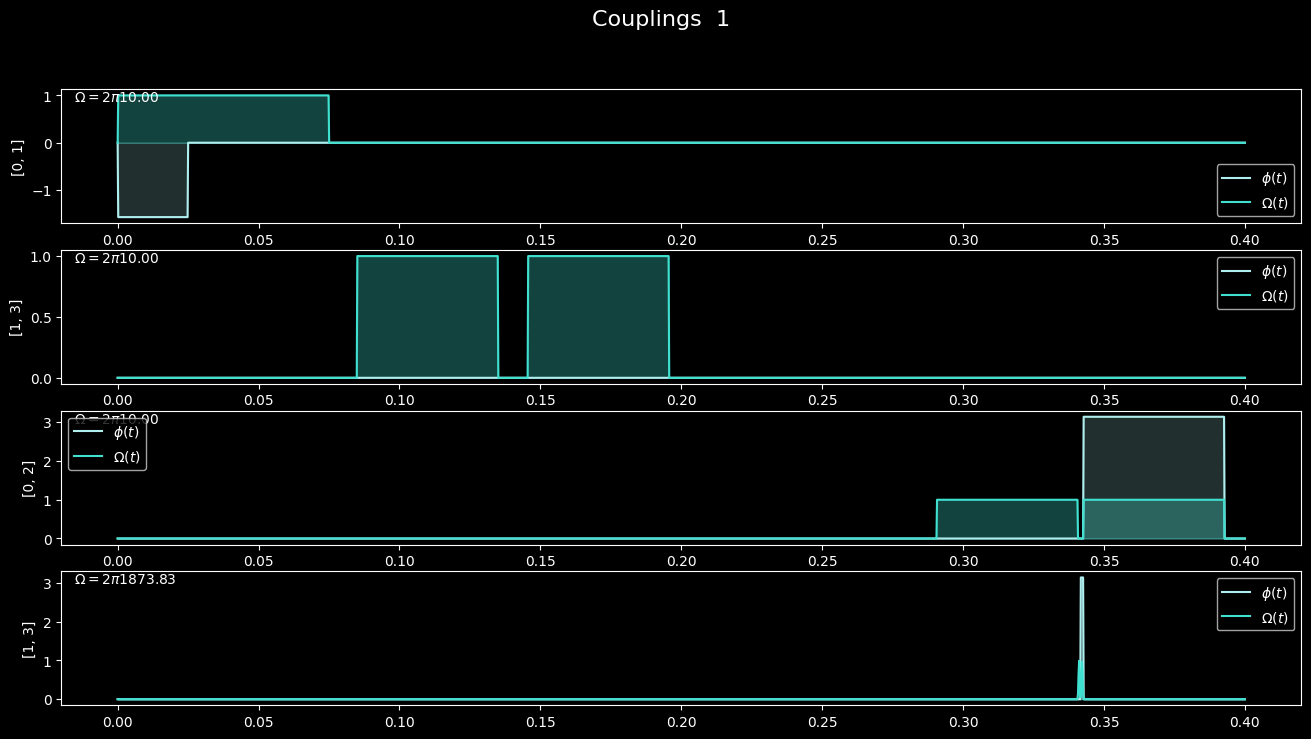

In [8]:
qc_transpiled = Transpiler(backend_config=new_backend)
ryd_schedule = qc_transpiled.transpile(qc)
ryd_schedule.plot_schedule()

Fort the simulation we invoke the same methods as before, taking special care for the initial state since it's a multiparticle circuit.

In [9]:
phi = qt.basis(4**2,0)

In [10]:
rydberg_register = qc_transpiled.build_transpiled_circuit(init_state=phi)
rydberg_register.atomic_register.showResults(plot_mode="plotly", figure_size=(800, 600))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>